# Принятие решений в бизнесе на основе данных

## Описание проекта

Аналитик и маркетологи крупного интернет-магазина подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

# Часть 1. Приоритизация гипотез

## Описание данных

Файл /datasets/hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

## Задачи 

В файле 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Необходимо:
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

# Часть 2. Анализ A/B-теста

## Описание данных

Файл /datasets/orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

## Задачи

Необходимо проанализировать A/B-тест:
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объяснить его. 
        Варианты решений: 
        - Остановить тест, зафиксировать победу одной из групп. 
        - Остановить тест, зафиксировать отсутствие различий между группами. 
        - Продолжить тест.

# Часть 1. Приоритизация гипотез

In [130]:
#Импорт библиотек
import pandas as pd
import math
from math import ceil
from math import factorial
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np

In [131]:
#Загрузка файла
df_hyp=pd.read_csv('/datasets/hypothesis.csv')

In [132]:
#Обзор данных
df_hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [133]:
#Приведение названий столбцов к нижнему регистру
df_hyp.columns=df_hyp.columns.str.lower()

### ICE (влияние, уверенность, усилия)

ICE score = (Impact x Confidence) / Efforts

In [134]:
#Расчет ICE score
df_hyp['ICE']=(df_hyp['impact']*df_hyp['confidence']/df_hyp['efforts']).round(2)

In [135]:
#Сортировка по ICE score
df_hyp.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


Самыми приоритетными оказались гипотезы:
- 8. Запустить акцию, дающую скидку на товар...
- 0. Добавить два новых канала привлечения трафика...
- 7. Добавить форму подписки...

### RICE (влияние, уверенность, усилия, охват)

RICE score = (Reach x Impact x Confidence) / Efforts

In [136]:
#Расчет RICE score
df_hyp['RICE']=df_hyp['impact']*df_hyp['confidence']*df_hyp['reach']/df_hyp['efforts']

In [137]:
#Сортировка по RICE score
df_hyp.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


Самыми приоритетными оказались гипотезы:
- 7. Добавить форму подписки...
- 2. Добавить блоки рекомендаций товаров на сайт...
- 0. Добавить два новых канала привлечения трафика...

# Часть 2. Анализ A/B-теста

In [138]:
#Загрузка файла
df_order=pd.read_csv('/datasets/orders.csv')
df_visit=pd.read_csv('/datasets/visitors.csv')

In [139]:
#Обзор данных
df_order

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [140]:
#Обзор данных
df_visit

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [141]:
#Типы данных
df_order.info()
df_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [142]:
#Привести даты к нужному типу
df_order['date'] = df_order['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df_visit['date'] = df_visit['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [143]:
#Типы данных
df_order.info()
df_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### 1. Построить график кумулятивной выручки по группам. 

In [144]:
#Создать датафрейм datesGroups с уникальными парами значений 'date' и 'group' таблицы orders
datesGroups = df_order[['date','group']].drop_duplicates()
datesGroups.tail(2)

,date,group
1149,2019-08-14,B
1150,2019-08-14,A


In [145]:
#Объявить переменную ordersAggregated
ordersAggregated = datesGroups.apply(
    lambda x: df_order[np.logical_and(df_order['date'] <= x['date'], df_order['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 
          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated.tail(2)

,date,group,transactionId,visitorId,revenue
958,2019-08-31,A,557,503,4084803
930,2019-08-31,B,640,586,5907760


In [146]:
#Названия столбцов
ordersAggregated.columns=['date', 'group', 'orders', 'buyers', 'revenue']
ordersAggregated.tail(2)

,date,group,orders,buyers,revenue
958,2019-08-31,A,557,503,4084803
930,2019-08-31,B,640,586,5907760


In [147]:
#Объявить переменную visitorsAggregated
visitorsAggregated = datesGroups.apply(
    lambda x: df_visit[np.logical_and(df_visit['date'] <= x['date'], df_visit['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated.tail(2)

,date,group,visitors
958,2019-08-31,A,18736
930,2019-08-31,B,18916


In [148]:
#Объединить ordersAggregated и visitorsAggregated по колонкам 'date', 'group'
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulativeData.tail(2)

,date,group,orders,buyers,revenue,visitors
60,2019-08-31,A,557,503,4084803,18736
61,2019-08-31,B,640,586,5907760,18916


In [149]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе 
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

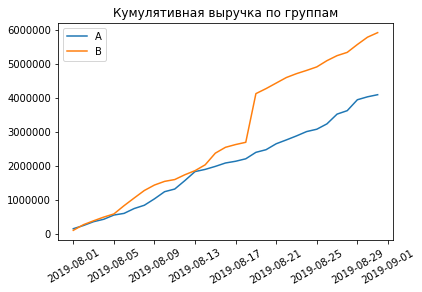

In [150]:
# Строим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation=30) 
plt.show()

В начале теста показатели в обеих группах находились примерно на одной линии. Спустя несколько дней показатели группы В стали стабильно превышать показатели группы А.

На графике группы А выручка увеличивается равномерно на протяжении всего теста. График группы В резко растет после 18.08.2019. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов. 

### 2. Построить график кумулятивного среднего чека по группам. 

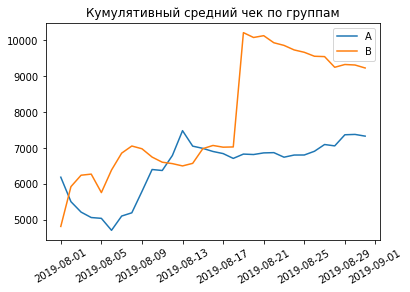

In [151]:
#Средний чек = выручка / количество заказов
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=30) 
plt.show()

В течение исследуемого периода показатели были не стабильны.

В группе А примерно первые 5 дней наблюдался довольно резкийй спад, затем показатели стали увеличиваться. Примерно с середины и до конца теста средний чек группы А стабилизировался.

В группе В в первой половине теста наблюдался общий тренд к увеличению, после 18.08.2019 опять видим резкий подъем (что опять наталкивает на предположение о появлении очень дорогих заказов). Последние 10 дней теста наблюдается тенденция на спад.

### 3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 

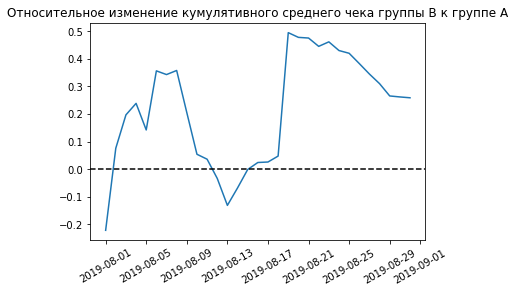

In [152]:
# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=30) 
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Вероятно где-то спрятались крупные заказы и выбросы.

### 4. Построить график кумулятивной конверсии по группам.

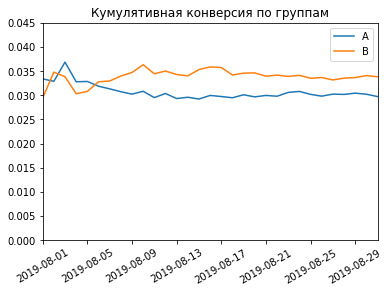

In [153]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

# строим графики
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.045])
plt.title('Кумулятивная конверсия по группам')
plt.xticks(rotation=30) 
plt.show()

В течение первых нескольких дней группы колебались около одного значения. Но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### 5. Построить график относительного изменения кумулятивной конверсии группы B к группе A.

No handles with labels found to put in legend.


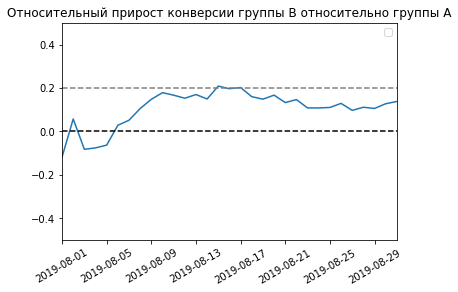

In [154]:
#Объединяем таблицы cummulativeDataA и cummulativeDataB
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#Строим график
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1)
plt.legend()

#Добавляем линии
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation=30) 
plt.show()

### 6. Построить точечный график количества заказов по пользователям.

In [155]:
#Обзор данных
df_order.tail(2)

,transactionId,visitorId,date,revenue,group
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


In [156]:
# Метод .drop(['...', '...', '...'], axis=1) поможет избавиться от лишних столбцов
ordersByUsers = df_order.drop(['group', 'revenue', 'date'], axis=1)
# Метод .groupby('...', as_index=False) сгруппирует заказы по пользователям
ordersByUsers = ordersByUsers.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
# Метод .agg({'...' : '...',}) посчитает агрегированные метрики на сгруппированных данных
# Метод pd.Series.nunique подсчитает число уникальных заказов
# Метод .sort_values(by='...',ascending=False) отсортирует датафрейм по значению в столбце
ordersByUsers.columns = ['visitorId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head())

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5


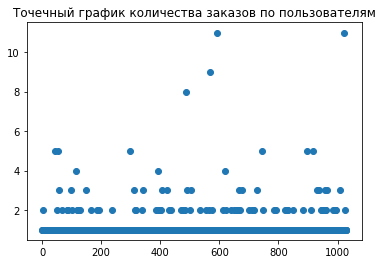

In [157]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.show()

Пользователей с двумя заказами уже значительно меньше, чем с одним. 3 и более заказов встречаются редко.

### 7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

In [158]:
#Перцентили
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали более 2 заказов, не более 1% пользователей совершали более 4 заказов. 

Количество заказов, превышающее три, примем за аномальные значения.

### 8. Построить точечный график стоимостей заказов.

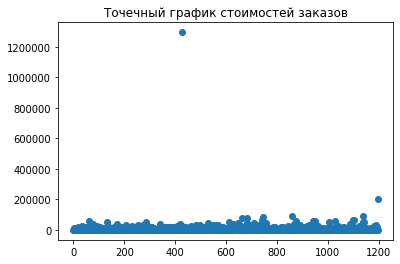

In [159]:
#Задаем значения для Х
x_values = pd.Series(range(0,len(df_order['revenue'])))

#Строим график
plt.scatter(x_values, df_order['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.show()

На графике есть явный выброс сверху, из-за этого график неинформативный. Ограничим значения < 200 000 руб.

In [160]:
#Удаляем выбросы
revenueByOrders=df_order[df_order['revenue']<=200000]

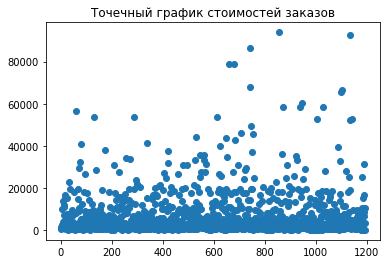

In [161]:
#Задаем значения для Х
x_values = pd.Series(range(0,len(revenueByOrders['revenue'])))

#Строим график
plt.scatter(x_values, revenueByOrders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.show()

Теперь график более информативный, однако по нему все еще сложно сделать выводы. Плотность значений к верхней границе уменьшается достаточно равномерно.

### 9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

In [162]:
#Перцентили
np.percentile(df_order['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов по стоимости превышали 28 000 руб., не более 1% превышали 58 233 руб.

### 10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. 

In [163]:
#Обзор данных
df_visit.tail(2)

,date,group,visitors
60,2019-08-30,B,490
61,2019-08-31,B,718


In [164]:
#Создаем таблицу visitorsADaily
visitorsADaily = df_visit[df_visit['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#Создаем таблицу visitorsACummulative
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#Создаем таблицу visitorsВDaily
visitorsBDaily = df_visit[df_visit['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#Создаем таблицу visitorsВCummulative
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [165]:
#Обзор данных
df_order.tail(2)

,transactionId,visitorId,date,revenue,group
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


In [166]:
#Группируем таблицу df_order по датам (для группы А)
ordersADaily = df_order[df_order['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

 
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

#Группируем таблицу df_order по датам (для группы В)
ordersBDaily = df_order[df_order['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [167]:
#Объединяем таблицы
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [168]:
ordersByUsersA = df_order[df_order['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = df_order[df_order['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']


In [169]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [170]:
ordersByUsersA = df_order[df_order['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = df_order[df_order['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [171]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.00840
0.138


P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ "сырых данных" сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13.8 %.

### 11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [172]:
print("{0:.3f}".format(stats.mannwhitneyu(df_order[df_order['group']=='A']['revenue'], df_order[df_order['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(df_order[df_order['group']=='B']['revenue'].mean()/df_order[df_order['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Но относительно различие среднего чека между сегментами 25.9%.

### 12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [173]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId']], axis = 0)
usersWithExpensiveOrders = df_order[df_order['revenue'] > 40000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
#print(abnormalUsers.shape)

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
Name: visitorId, dtype: int64


Теперь у нас есть множество аномальных пользователей. После их удаления посчитаем стат.значимость. Надо выяснить, есть ли существенные различия между группами с очищенными данными.

In [174]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00465
0.164


Как и в случае с сырыми данными статистическая значимость достигнута. Сегмент В лучше сегмента А. Показатель относительного прироста конверсии группы В к конверсии группы А увеличился до 16.4%.

### 13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [175]:
print("{0:.3f}".format(stats.mannwhitneyu(
    df_order[np.logical_and(
        df_order['group']=='A',
        np.logical_not(df_order['visitorId'].isin(abnormalUsers)))]['revenue'],
    df_order[np.logical_and(
        df_order['group']=='B',
        np.logical_not(df_order['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    df_order[np.logical_and(df_order['group']=='B',np.logical_not(df_order['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    df_order[np.logical_and(
        df_order['group']=='A',
        np.logical_not(df_order['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.355
0.060


###  14. Принять решение по результатам теста и объяснить его.

## Обобщение результатов

Результаты графических и аналитических методов совпали. Тесты показали, что конверсия группы B стабильно лучше конверсии группы А, это так же было видно на графиках. Разница в средних чеках на графиках не была очевидной, так же она не подтвердилась после проведения тестов.

В данных были обнаружены выбросы. После очистки данных от аномальных значений тесты показали те же результаты. Конверсия группы В стабильно лучше (причем показатель относительного прироста увеличился с 13.8% до 16.4%), разница в средних чеках не является статистически значимой (причем относительный показатель различия снизился с 25.9% до 6%).



## Вывод

Остановить тест, зафиксировать победу одной из групп.